# Nonlinear simultaneous equations

Consider the nonlinear simultaneous equations:

$$
(1 - a)b = x \\
a (1 - b) = y \\
$$

where $0 \leq a,b,x,y \leq 1$. $x$ and $y$ are known. What are $a$ and $b$?

## Optimisation approach

For a given estimate of $\hat{a}$ and $\hat{b}$, define the error as

$$
\epsilon = \sqrt{ \Big[(1-\hat{a})\hat{b} - x\Big]^2 + \Big[\hat{a}(1 - \hat{b}) - y\Big]^2 }
$$

In [44]:
import math

def my_small_func(g):
    
    x = 0.3
    y = 0.2
    
    a_hat = g[0]
    b_hat = g[1]

    # Squared error
    #return ((1-a_hat)*b_hat - x)**2 + (a_hat*(1-b_hat) - y)**2

    return abs((1-a_hat)*b_hat - x) + abs(a_hat*(1-b_hat) - y)

In [45]:
from scipy.optimize import minimize, shgo

start_guess = [.5,.5]
my_ranges = ((0,1),(0,1))

# minimize 
result = minimize(my_small_func, x0=start_guess, method='SLSQP', bounds=my_ranges, options={'ftol': 1e-9, 'disp': True})
print(result)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.004554888843442351
            Iterations: 22
            Function evaluations: 141
            Gradient evaluations: 22
     fun: 0.004554888843442351
     jac: array([-0.09545195,  0.09543836])
 message: 'Optimization terminated successfully'
    nfev: 141
     nit: 22
    njev: 22
  status: 0
 success: True
       x: array([0.45228082, 0.54772598])


In [46]:
a_hat = result.x[0]
b_hat = result.x[1]

In [47]:
(1-a_hat) * b_hat

0.3000000222363208

In [48]:
a_hat * (1 - b_hat)

0.20455486660712158

In [49]:
(1-0.5)*0.6

0.3

In [50]:
0.5*(1-0.6)

0.2

In [59]:
0.5*0.6

0.3

In [51]:
shgo(my_small_func, my_ranges)

     fun: 0.004554855527363344
    funl: array([0.00455486])
 message: 'Optimization terminated successfully.'
    nfev: 318
     nit: 2
   nlfev: 313
   nlhev: 0
   nljev: 42
 success: True
       x: array([0.45214871, 0.54759386])
      xl: array([[0.45214871, 0.54759386]])

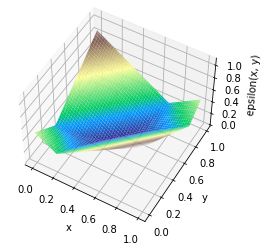

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = np.arange(0.0, 1.0 ,0.01)
y = np.arange(0.0, 1.0, 0.01)
xgrid, ygrid = np.meshgrid(x, y)
xy = np.stack([xgrid, ygrid])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(50, -60)
ax.plot_surface(xgrid, ygrid, my_small_func(xy), cmap='terrain')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('epsilon(x, y)')
plt.show()